In [78]:
import pandas as pd
import numpy as np
from scipy import *
import pingouin as pg
from scipy import stats
import matplotlib.pyplot as plt
from pingouin import ttest

In [79]:
df = pd.read_excel('/home/jan/Documents/Doktorarbeit/Analyse/Physio/Physio_combindet_ohne_Kommata.xlsx', index_col=0)
df1 = pd.read_excel('/home/jan/Documents/Doktorarbeit/Analyse/Physio/Physio_maxima.xlsx', index_col=0)

In [80]:
block1a = df.iloc[6:154,:]
block1b = df.iloc[182:330,:]
block1c = df.iloc[358:506,:]
block1d = df.iloc[534:682,:]

In [81]:
index = df.index
columns = df.columns
values = df.values

In [82]:
'''m=musik generell, md=musik diff, ad=alle diff'''

m = ['P5;1','P5;2','P5;3','P6;1','P6;2','P6;3','P11;1','P11;2','P11;3','P14;1','P14;2','P14;3','P16;1','P16;2','P16;3','P19;1','P19;2','P19;3','P23;1','P23;2','P23;3','P24;1','P24;2','P24;3','P26;1','P26;2','P26;3','P27;1','P27;2','P27;3','P28;1','P28;2','P28;3','P29;1','P29;2','P29;3']
s = ['P7;1','P7;2','P7;3','P8;1','P8;2','P8;3','P9;1','P9;2','P9;3','P10;1','P10;2','P10;3','P12;1','P12;2','P12;3','P13;1','P13;2','P13;2','P15;1','P15;2','P15;3','P17;1','P17;2','P17;3','P18;1','P18;2','P18;3','P20;1','P20;2','P20;3','P21;1','P21;2','P21;3','P22;1','P22;2','P22;3','P25;1','P25;2','P25;3']
md = ['P5;1','P6;1','P11;1','P14;1','P16;1','P19;1','P23;1','P24;1','P26;1','P27;1','P28;1','P29;1']
sd = ['P7;1','P8;1','P9;1','P10;1','P12;1','P13;1','P15;1','P17;1','P18;1','P20;1','P21;1','P22;1','P25;1']
ad = [4,7,10,13,16,19,22,25,28,31,34,37,40,43,46,49,52,55,58,61,64,67,70,73,76,79,82,85,88]

In [83]:
music = df.loc[:,m]
sound = df.loc[:,s]

In [84]:
d_music = music.describe()

In [85]:
df1_g = df1.iloc[[8,9,10],ad]

In [86]:
music_diff = df1_g.loc[:,md]
sound_diff = df1_g.loc[:,sd]

In [87]:
col_rename= {'P5;1':'P5','P6;1':'P6','P11;1':'P11','P14;1':'P14','P16;1':'P16','P19;1':'P19','P23;1':'P23','P24;1':'P24','P26;1':'P26','P27;1':'P27','P28;1':'P28','P29;1':'P29'}
idx_rename = {'Diff_max_1_3_alle_P':'m_diff_max_13', 'Diff_mean_1_3_alle_P':'m_diff_mean_13', 'Diff_min_1_3_alle_P':'m_diff_min13'}
cols_rename= {'P7;1':'P7','P8;1':'P8','P9;1':'P9','P10;1':'P10','P12;1':'P12','P13;1':'P13','P15;1':'P15','P17;1':'P17','P18;1':'P18','P21;1':'P21','P20;1':'P20','P22;1':'P22','P25;1':'P25'}
idxs_rename = {'Diff_max_1_3_alle_P':'s_diff_max_13', 'Diff_mean_1_3_alle_P':'s_diff_mean_13', 'Diff_min_1_3_alle_P':'s_diff_min13'}

In [88]:
music_diff_r = music_diff.rename(index=idx_rename, columns=col_rename)
sound_diff_r = sound_diff.rename(index=idxs_rename, columns=cols_rename)

In [89]:
cols_rename= {'P7;1':'P7','P8;1':'P8','P9;1':'P9','P10;1':'P10','P12;1':'P12','P13;1':'P13','P15;1':'P15','P17;1':'P17','P18;1':'P18','P21;1':'P21','P20;1':'P20','P22;1':'P22','P25;1':'P25'}
idxs_rename = {'Diff_max_1_3_alle_P':'s_diff_max_13', 'Diff_mean_1_3_alle_P':'s_diff_mean_13', 'Diff_min_1_3_alle_P':'s_diff_min13'}

In [90]:
music_diff_r_tr = np.transpose(music_diff_r, axes=None)
sound_diff_r_tr = np.transpose(sound_diff_r, axes=None)

In [91]:
#Diff der Mittelwerte in der Musikgruppe mit Nan Werten
m_na = music_diff_r_tr.iloc[:,[1]]
s_na = sound_diff_r_tr.iloc[:,[1]]

In [92]:
#ohne Nan Werte
m = m_na.dropna()
s = s_na.dropna()
ms = pd.concat([s,m])
m_array = m.as_matrix()
s_array = s.as_matrix()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [93]:
np.mean(music_diff_r, axis =1)

m_diff_max_13     2.001235
m_diff_mean_13    0.950093
m_diff_min13     -1.659111
dtype: float64

In [94]:
np.mean(sound_diff_r, axis =1)

s_diff_max_13     2.775959
s_diff_mean_13    2.386157
s_diff_min13      0.285810
dtype: float64

In [106]:
np.var(music_diff_r, axis = 1)

m_diff_max_13     18.988972
m_diff_mean_13     9.638524
m_diff_min13      10.324909
dtype: float64

In [107]:
np.var(sound_diff_r, axis = 1)

s_diff_max_13     111.275114
s_diff_mean_13     19.324783
s_diff_min13        8.611404
dtype: float64

In [95]:
np.std(music_diff_r, axis = 1)

m_diff_max_13     4.357634
m_diff_mean_13    3.104597
m_diff_min13      3.213240
dtype: float64

In [96]:
np.std(sound_diff_r, axis = 1)

s_diff_max_13     10.548702
s_diff_mean_13     4.395996
s_diff_min13       2.934519
dtype: float64

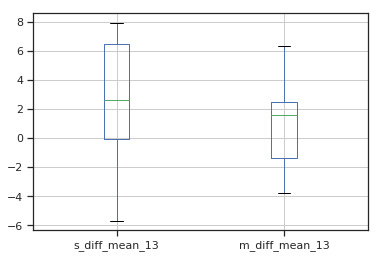

In [97]:
%matplotlib inline
ms.boxplot(column=['s_diff_mean_13','m_diff_mean_13']);

(array([2., 1., 1., 1., 0., 3., 1., 0., 0., 2.]),
 array([-3.78056549, -2.76630235, -1.75203921, -0.73777607,  0.27648706,
         1.2907502 ,  2.30501334,  3.31927648,  4.33353962,  5.34780276,
         6.36206589]),
 <a list of 10 Patch objects>)

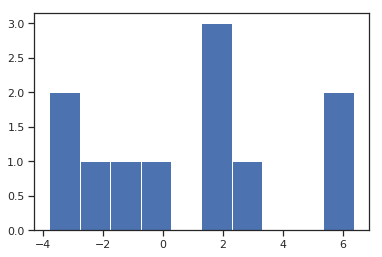

In [98]:
plt.hist(m_array)

(array([1., 1., 0., 1., 1., 1., 2., 0., 1., 3.]),
 array([-5.66739295, -4.30687553, -2.94635812, -1.5858407 , -0.22532329,
         1.13519413,  2.49571154,  3.85622896,  5.21674637,  6.57726379,
         7.9377812 ]),
 <a list of 10 Patch objects>)

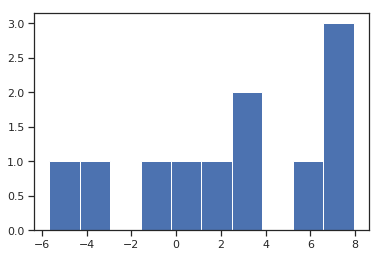

In [99]:
plt.hist(s_array)

In [100]:
# Normalverteilt
stats.shapiro(m_array)

(0.9643765687942505, 0.8248171806335449)

In [101]:
# Normalverteilt
stats.shapiro(s_array)

(0.9277293086051941, 0.38834190368652344)

In [102]:
# T-Test ungepaart Werte sind nicht voneinander abhängig, der beiden Diff means der sound und der Musik Gruppe
ttest(m_array, s_array, paired =False)

,T,p-val,dof,tail,cohen-d,power,BF10
T-test,-0.844,0.40875,20,two-sided,0.36,0.124,0.496


In [103]:
#Man Whitney U Test , angenommen nicht parametrisch
pg.mwu(m_array, s_array)

,U-val,p-val,RBC,CLES
MWU,46.0,0.357933,0.239669,0.619835


In [104]:
# hier ist die Frage, ob es überhaupt sinnhaft ist die Korrelationen zu rechnen
pearson_correlation = pg.corr(s_array, m_array)
display(pearson_correlation)
cor_coeeficient = pearson_correlation['r']
n =  len(s+m)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,11,0.016,"[[-0.59], [0.61]]",0.0,-0.25,0.963842,0.223,0.049
